# Higher order differential equations

## A typical problem is to solve a second or higher order ODE for a given set of initial conditions. Here we illustrate using odeint to solve the equation for a driven damped pendulum. The equation of motion for the angle $\theta$ that the pendulum makes with the vertical is given by

<h2 align="center"></h2> <img src="https://physics.nyu.edu/pine/pymanual/html/_images/math/87bf1cfa461f26fa789f5648a13dc79a926f53b4.png" width="400">

## r, d is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. Reduced variables have been used such that the natural (angular) frequency of oscillation is 1. The ODE is nonlinear owing to the $\sin\theta$ term. Of course, it’s precisely because there are no general methods for solving nonlinear ODEs that one employs numerical techniques, so it seems appropriate that we illustrate the method with a nonlinear ODE.


## We start by transforming our second order ODE into two coupled first order ODEs. The transformation is easily accomplished by defining a new variable $\omega \equiv d\theta/dt$. With this definition, we can rewrite our second order ODE as two coupled first order ODEs:

<h2 align="center"></h2> <img src="https://physics.nyu.edu/pine/pymanual/html/_images/math/c39547ea84078f6fa85674a066c33ce0ed72e219.png" width="400">

## In this case the functions on the right hand side of the equations are:


<h2 align="center"></h2> <img src="https://physics.nyu.edu/pine/pymanual/html/_images/math/be5e9ef0971302a758223f43b5673f39c5c7125b.png" width="400">




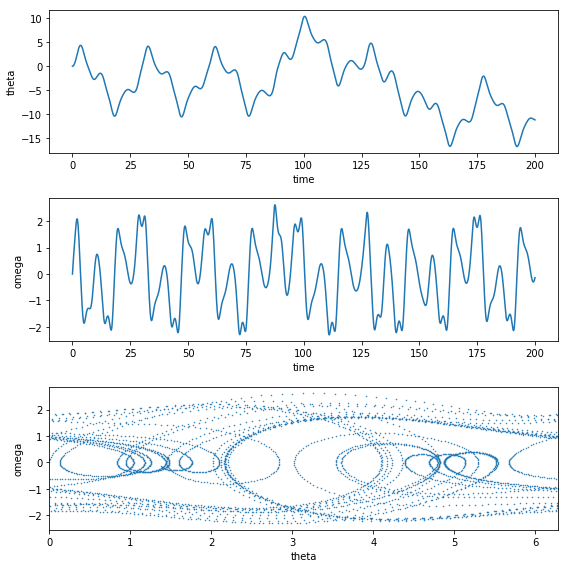

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html

def f(y, t, params):
    theta, omega = y      # unpack current values of y
    Q, d, Omega = params  # unpack parameters
    derivs = [omega,      # list of dy/dt=f functions
             -omega/Q + np.sin(theta) + d*np.cos(Omega*t)]
    return derivs

# Parameters
Q = 2.0          # quality factor (inverse damping)
d = 1.5          # forcing amplitude
Omega = 0.65     # drive frequency

# Initial values
theta0 = 0.0     # initial angular displacement
omega0 = 0.0     # initial angular velocity

# Bundle parameters for ODE solver
params = [Q, d, Omega]

# Bundle initial conditions for ODE solver
y0 = [theta0, omega0]

# Make time array for solution
tStop = 200.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('omega')

# Plot omega vs theta
ax3 = fig.add_subplot(313)
twopi = 2.0*np.pi
ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
ax3.set_xlabel('theta')
ax3.set_ylabel('omega')
ax3.set_xlim(0., twopi)

plt.tight_layout()
plt.show()

Assume a particle is subject to two forces: gravity mg=(0,−9.81⋅m) and air drag F=−ku′. This last term depends on the particle's speed and is only valid at low speed. 

We have two variables: x and y (two dimensions). We note u=(x,y). The ODE that we are going to simulate is:
$$u'' = -\frac{k}{m} u' + g$$

(0, 6)

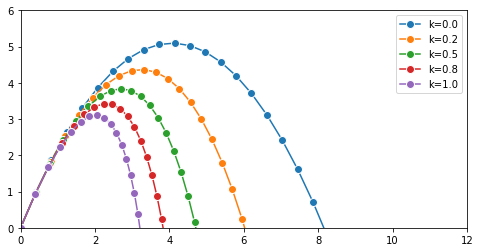

In [21]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline
# https://ipython-books.github.io/123-simulating-an-ordinary-differential-equation-with-scipy/

m = 1.  # particle's mass
k = 1.  # drag coefficient
g = 9.81  # gravity acceleration

# The initial position is (0, 0).
v0 = np.zeros(4)
# The initial speed vector is oriented
# to the top right.
v0[2] = 4.
v0[3] = 10.

def f(v, t0, k):
    # v has four components: v=[u, u'].
    u, udot = v[:2], v[2:]
    # We compute the second derivative u'' of u.
    udotdot = -k / m * udot
    udotdot[1] -= g
    # We return v'=[u', u''].
    return np.r_[udot, udotdot]

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.linspace(0., 3., 30)

# We simulate the system for different values of k.
for k in np.linspace(0., 1., 5):
    # We simulate the system and evaluate $v$ on the
    # given times.
    v = spi.odeint(f, v0, t, args=(k,))
    # We plot the particle's trajectory.
    ax.plot(v[:, 0], v[:, 1], 'o-', mew=1, ms=8,
            mec='w', label=f'k={k:.1f}')
ax.legend()
ax.set_xlim(0, 12)t
ax.set_ylim(0, 6)

# Partial differential equations
## The diffusion equation

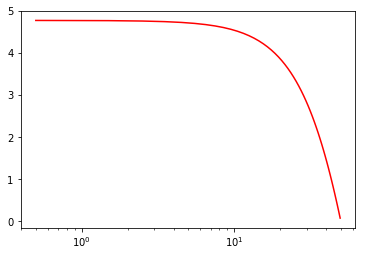

In [11]:
from fipy import *
import matplotlib.pyplot as plt
import numpy as np


niterations = 100  # number of iterations
nx = 50  # number of grid points
dx = 1  # size of grid spatial step
mesh = Grid1D(nx=nx, dx=dx)   # create the 1D grid
initialvalue = 10.    # initial value, constant throughout the grid
diffcoef = 10.   # value of the diffusion coefficient
deltadt = 1   # time step

phi = CellVariable(name="variable",  mesh=mesh, value=initialvalue)  # internal variable
Ddiff = CellVariable(name="Diff",  mesh=mesh, value=diffcoef)      # diffusion coefficient (internal)

valueRight = 0.    # boundary condition at right side of the grid. Left is 0 flux by default.
phi.constrain(valueRight, mesh.facesRight)



eqX = TransientTerm() == ImplicitDiffusionTerm(coeff=Ddiff)  # the actual equation

for step in range(niterations):
    eqX.solve(var=phi, dt=deltadt)      # solve it niterations number of times.



plt.plot(np.array(mesh.x), np.array(phi), c='r')  # plot
plt.xscale('log')



plt.show()